### Pre-processing EEG data with MNE-Python
Datagenerated in BrainVision Recorder software (.vhdr, .eeg, .vmrk)

#### Packets and connections

In [10]:
#!git clone https://github.com/abner-lucas/preprocessing_EEG_with_MNE.git

In [11]:
#Install package
#!pip install mne
#!pip install autoreject
#!pip install h5io

In [12]:
#Connect to Google Drive to get raw data
#from google.colab import drive
#drive.mount('/content/drive/')

In [13]:
import mne
mne.set_log_level('error')

import glob
import pandas as pd
import json
import matplotlib.pyplot as plt

#### Loading data

In [14]:
#Dataset path in my GDrive or in local
path = f'/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/data_brainvision/'
#path = f'data_brainvision/'
subject = 'Metzler0004'

#Checking existence of all files
n_files = len(glob.glob(path + subject + '*'))
if n_files < 3:
    print('There are missing files')
    #Stop running
    raise SystemExit

name_files = [subject + '.eeg', subject + '.vhdr', subject + '.vmrk']
files = [path + name for name in name_files]
files

['/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/data_brainvision/Metzler0004.eeg',
 '/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/data_brainvision/Metzler0004.vhdr',
 '/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/data_brainvision/Metzler0004.vmrk']

In [15]:
#Reading EEG files
raw_data = mne.io.read_raw_brainvision(files[1], preload=True) #Preloading raw data into memory
raw_data

<RawBrainVision | Metzler0004.eeg, 64 x 1823140 (1823.1 s), ~890.3 MB, data loaded>

In [18]:
#Get events point and its descriptors
events, event_dict = mne.events_from_annotations(raw_data)

#Load updated descriptors from json file
with open('/content/preprocessing_EEG_with_MNE/datasets/event_stimulus_new_dict.json', 'r') as f:
#with open('datasets\event_stimulus_new_dict.json', 'r') as f:
    event_new_dict = json.load(f)

#Save events_stimulis with txt
#for i in range(len(events)):
#    with open(f'/content/preprocessing_EEG_with_MNE/datasets/{subject}_events.txt', 'a') as f:
#    with open(f'datasets/{subject}_events_stimulus.txt', 'a') as f:
#        f.write(str(events[i]) + '\n')       

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


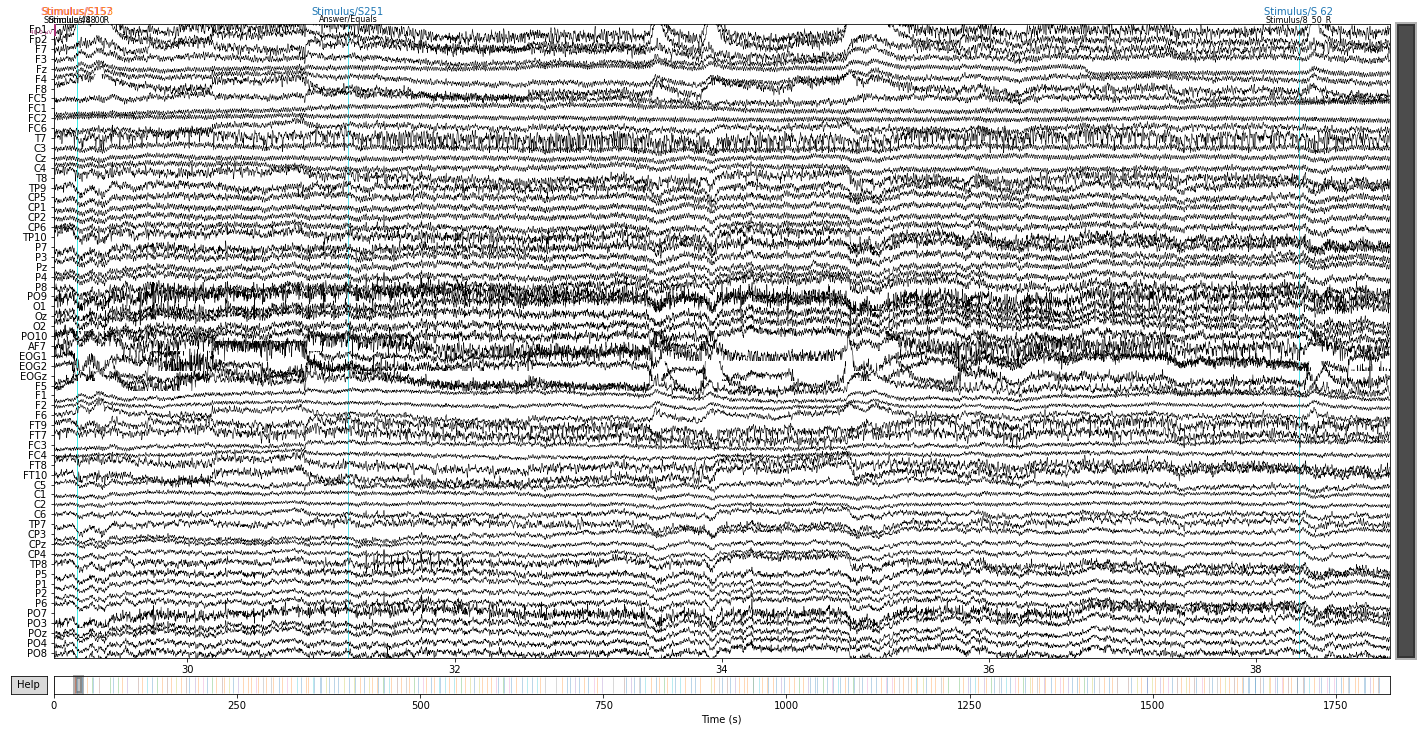

In [19]:
#Resizing plot figure
mne.set_config('MNE_BROWSE_RAW_SIZE','20,10')

#Plotting first 5s of raw data from all channels
fig1 = raw_data.plot(n_channels=64, start=29, duration=10, title='Signal raw data', events=events, event_id=event_new_dict);

#save figure
#fig1.savefig('/content/preprocessing_EEG_with_MNE/outputs_fig/fig1_signal_raw_data.png', dpi=600)
#fig1.savefig('outputs_fig/fig1_signal_raw_data.png', dpi=600)

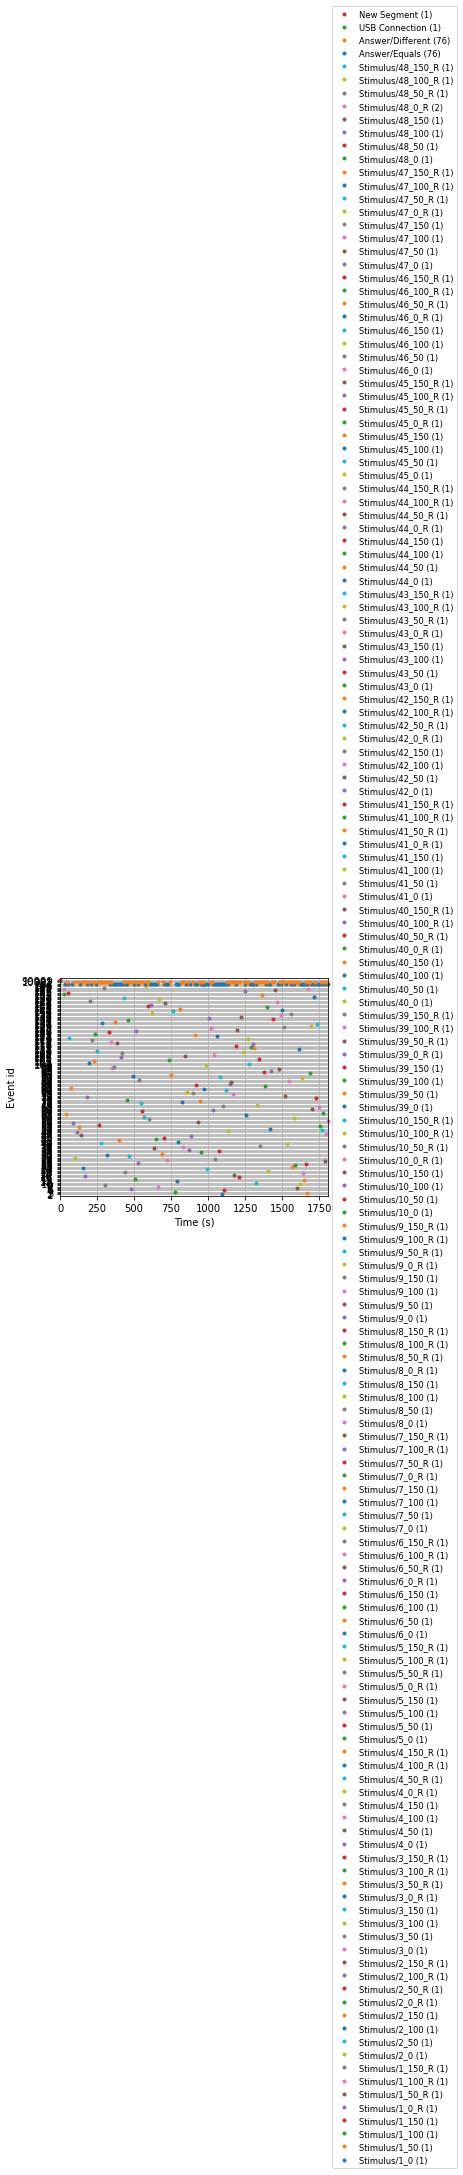

In [20]:
#Plotting events
fig2 = mne.viz.plot_events(events, event_id=event_new_dict, sfreq=raw_data.info['sfreq']);

#save figure
#fig2.savefig('/content/preprocessing_EEG_with_MNE/outputs_fig/fig2_events_point.png', dpi=600)
#fig2.savefig('outputs_fig/fig2_events_point.png', dpi=600)

#### Working with metadata

In [21]:
#Viewing keys in the raw data
raw_data.info.keys()

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])

In [22]:
#Viewing dictionary of raw data
raw_data.__dict__

{'_annotations': <Annotations | 315 segments: Comment/no USB Connection to actiCAP (1), New ...>,
 '_cals': array([1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
        1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
        1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
        1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
        1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
        1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
        1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
        1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07]),
 '_comp': None,
 '_cropped_samp': 0,
 '_data': array([[-1.557e-04, -1.458e-04, -1.393e-04, ...,  7.910e-05,  7.840e-05,
          7.880e-05],
        [-6.070e-05, -6.570e-05, -6.900e-05, ...,  8.900e-06,  7.400e-06,
          6.600e-06],
        [-2.400e-05, -2.000e-05, -1.480e-05, ...,  1.510e-04,  1.484e-04,
   

In [23]:
#Viewing channel names
print(raw_data.info['ch_names'])

['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10', 'P7', 'P3', 'Pz', 'P4', 'P8', 'PO9', 'O1', 'Oz', 'O2', 'PO10', 'AF7', 'EOG1', 'EOG2', 'EOGz', 'F5', 'F1', 'F2', 'F6', 'FT9', 'FT7', 'FC3', 'FC4', 'FT8', 'FT10', 'C5', 'C1', 'C2', 'C6', 'TP7', 'CP3', 'CPz', 'CP4', 'TP8', 'P5', 'P1', 'P2', 'P6', 'PO7', 'PO3', 'POz', 'PO4', 'PO8']


In [24]:
#Setting the reference channel for eyes movement
raw_data.set_channel_types({'EOG1': 'eog', 'EOG2': 'eog', 'EOGz': 'eog'})

<RawBrainVision | Metzler0004.eeg, 64 x 1823140 (1823.1 s), ~890.3 MB, data loaded>

In [25]:
#Setting the 10-20 pattern in the channel position
raw_data.set_montage('standard_1020')
raw_data.info['dig']

[<DigPoint |        LPA : (-82.5, -0.0, 0.0) mm     : head frame>,
 <DigPoint |     Nasion : (0.0, 114.0, 0.0) mm      : head frame>,
 <DigPoint |        RPA : (82.5, 0.0, -0.0) mm      : head frame>,
 <DigPoint |     EEG #1 : (-30.9, 114.6, 27.9) mm   : head frame>,
 <DigPoint |     EEG #3 : (28.4, 115.3, 27.7) mm    : head frame>,
 <DigPoint |     EEG #5 : (-56.4, 99.2, 25.1) mm    : head frame>,
 <DigPoint |    EEG #16 : (-71.9, 73.1, 25.8) mm    : head frame>,
 <DigPoint |    EEG #17 : (-66.1, 80.2, 53.8) mm    : head frame>,
 <DigPoint |    EEG #18 : (-51.8, 86.7, 78.7) mm    : head frame>,
 <DigPoint |    EEG #19 : (-29.0, 91.4, 96.6) mm    : head frame>,
 <DigPoint |    EEG #20 : (-1.2, 93.3, 102.6) mm    : head frame>,
 <DigPoint |    EEG #21 : (28.0, 91.9, 95.8) mm     : head frame>,
 <DigPoint |    EEG #22 : (50.3, 87.4, 77.3) mm     : head frame>,
 <DigPoint |    EEG #23 : (66.3, 81.5, 53.1) mm     : head frame>,
 <DigPoint |    EEG #24 : (71.4, 74.5, 25.1) mm     : head fra

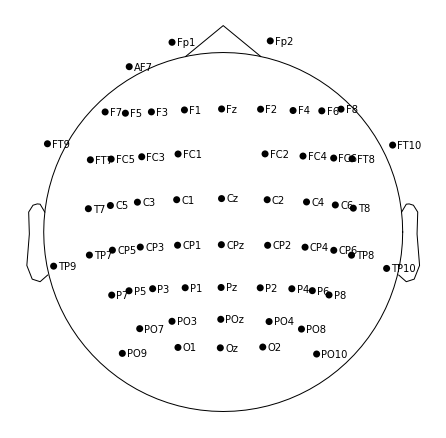

In [26]:
#Plotting the name and position of sensors
fig3 = raw_data.plot_sensors(show_names=True, title='Sensor positions - 10-20');

#save figure
#fig3.savefig('/content/preprocessing_EEG_with_MNE/outputs_fig/fig3_sensor_positions.png', dpi=600)
#fig3.savefig('outputs_fig/fig3_sensor_positions.png', dpi=600)

##### Stimulus

In [27]:
#Selecting only stimuli and response
events_clean = []
for i in range(len(events)):
    if i+1 < len(events):
        #se o valor de terceira coluna for igual a 252
        if (events[i][2] != 251) and (events[i][2] != 252):
            if (events[i+1][2] == 251) or (events[i+1][2] == 252):
                events_clean.append(events[i])
                events_clean.append(events[i+1])

#Selecting only stimuli without responses
stimulus_clean = [x for i, x in enumerate(events_clean) if i % 2 == 0]

if len(stimulus_clean) < 120:
    print('The subject performed less than 120 trials')
    #Stop running
    raise SystemExit
else:
    print('The subject performed 75% of the total trails')

#Descriptors that used
stimulus_clean_new_dict = {}
for key, value in event_new_dict.items():
    if value in [x[2] for x in stimulus_clean]:
        stimulus_clean_new_dict.update({key: value})

The subject performed 75% of the total trails


#### Filters

##### Resampling

In [28]:
#Downsampling (1000Hz to 250Hz)
#print('Frequency before resampling: ', raw_data.info['sfreq'], 'Hz')
#down_data = raw_data.copy().resample(250)
#print('Frequency after resampling: ', down_data.info['sfreq'], 'Hz')

#WARNING: Resampling from the data will influence ERPs.

##### Band-pass

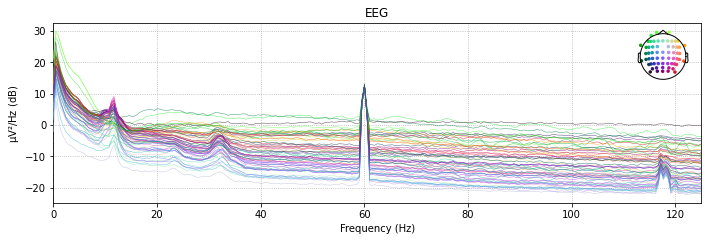

In [29]:
#Plotting the power spectral density
fig4 = raw_data.plot_psd(fmax=125);

#Save figure
#fig4.savefig('/content/preprocessing_EEG_with_MNE/outputs_fig/fig4_power_density_250Hz.png', dpi=600)
#fig4.savefig('outputs_fig/fig4_power_density_250Hz.png', dpi=600)

In [30]:
#Band-pass filter (high-pass = 0.1Hz and low-pass = 35Hz)
f_data = raw_data.copy().filter(l_freq=0.1, h_freq=35)

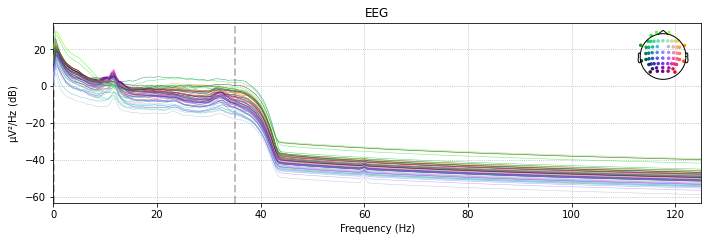

In [31]:
#Plotting the power spectral density
fig5 = f_data.plot_psd(fmax=125);

#Save figure
#fig5.savefig('/content/preprocessing_EEG_with_MNE/outputs_fig/fig5_power_density_35Hz.png', dpi=600)
#fig5.savefig('outputs_fig/fig5_power_density_35Hz.png', dpi=600)

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


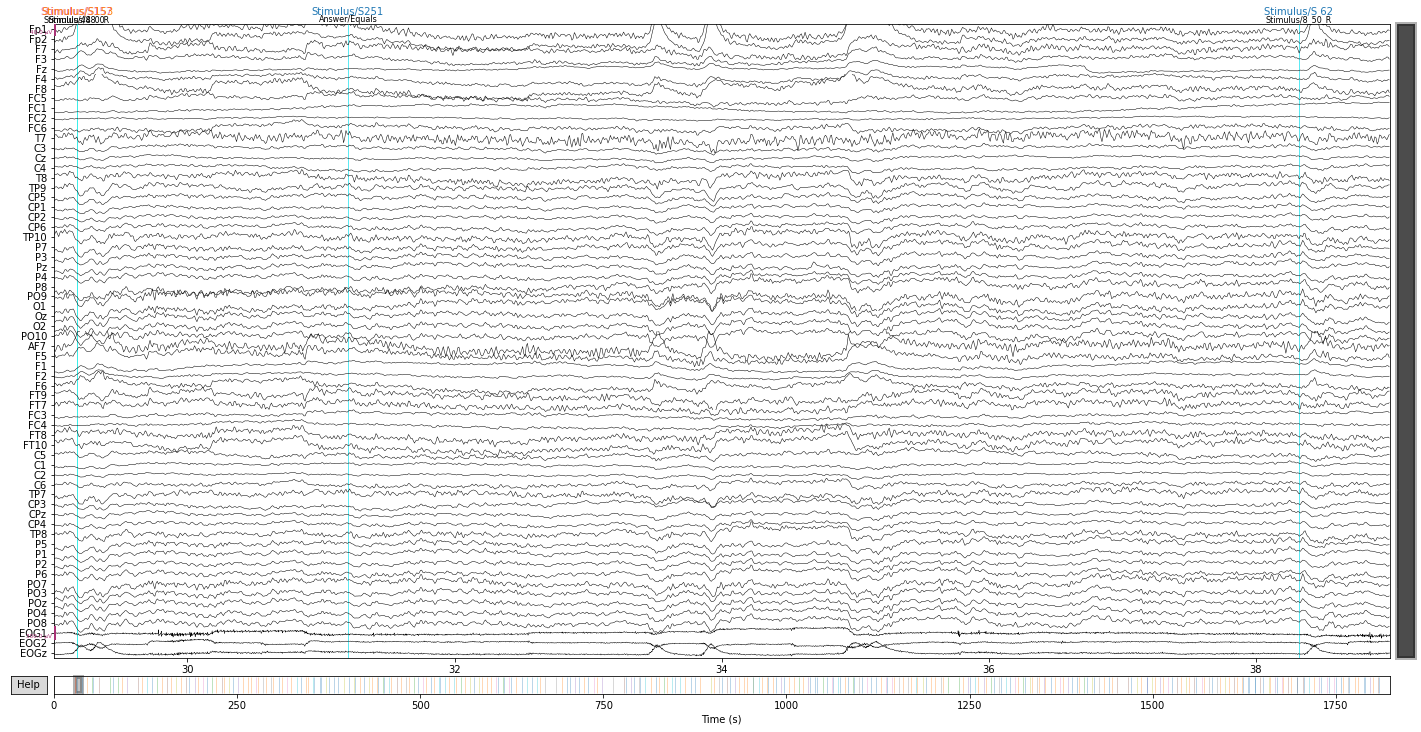

In [32]:
#Plotting filtered data
fig6 = f_data.plot(n_channels=64, start=29, duration=10, title='Filtered signal data', events=events, event_id=event_new_dict);

#Save figure
#fig6.savefig('/content/preprocessing_EEG_with_MNE/outputs_fig/fig6_filtered_signal_data.png', dpi=600)
#fig6.savefig('outputs_fig/fig6_filtered_signal_data.png', dpi=600)

##### Trials

In [33]:
#Segmenting ERP signal:
# - 200 ms before stimulus and 4000 ms after
# - Baseline correction by subtracting the mean potential amplitude from the 200 ms interval immediately preceding the stimulus at each epoch
tinitial = -0.2
tfinal = 4.0

picks = mne.pick_types(f_data.info, eeg=True, eog=True, stim=True, meg=False, ecg=False, exclude='bads')
epochs = mne.Epochs(f_data.copy(), stimulus_clean, stimulus_clean_new_dict, picks=picks,
                    tmin=tinitial, tmax=tfinal, baseline=(None, 0), event_repeated='drop',
                    preload=True)
epochs

<Epochs |  152 events (all good), -0.2 - 4 sec, baseline -0.2 – 0 sec, ~311.9 MB, data loaded,
 'Stimulus/1_0': 1
 'Stimulus/1_50': 1
 'Stimulus/1_100': 1
 'Stimulus/1_150': 1
 'Stimulus/1_0_R': 1
 'Stimulus/1_50_R': 1
 'Stimulus/1_100_R': 1
 'Stimulus/1_150_R': 1
 'Stimulus/2_0': 1
 'Stimulus/2_50': 1
 and 142 more events ...>

In [34]:
#Compute global rejection thresholds
from autoreject import get_rejection_threshold

bias_reject = get_rejection_threshold(epochs)
bias_reject

Estimating rejection dictionary for eeg
Estimating rejection dictionary for eog


{'eeg': 0.000220813194309668, 'eog': 0.0002498}

In [35]:
#Delete epochs with high bias
#epochs.drop_bad(reject=bias_reject, flat=None)

#WARNING: Removing epochs from the data will influence ERPs.

##### PREP pipeline

In [36]:
#Selecting and rebuilding bad electrodes with interpolation (PREP pipeline)
from autoreject import Ransac   # noqa

ransac = Ransac(verbose=True)
epochs_clean = ransac.fit_transform(epochs)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min finished


In [37]:
#Bad electrodes
print(ransac.bad_chs_)

#Marking bad electrodes
epochs_clean.info['bads'] = ransac.bad_chs_

['FC4']


##### Evoked

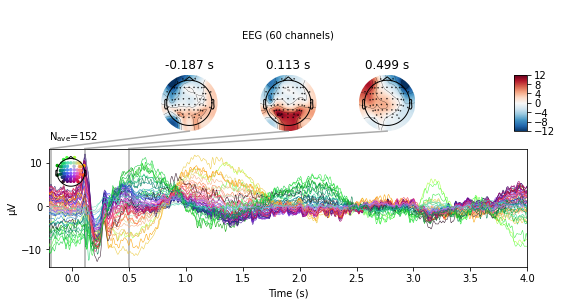

In [38]:
#Plotting the average of the epochs
evoked = epochs.average()
evoked_clean = epochs_clean.average()

fig7 = evoked_clean.detrend().plot_joint();

#save figure
#fig7.savefig('/content/preprocessing_EEG_with_MNE/outputs_fig/fig7_average_epochs.png', dpi=600)
#fig7.savefig('outputs_fig/fig7_average_epochs.png', dpi=600)

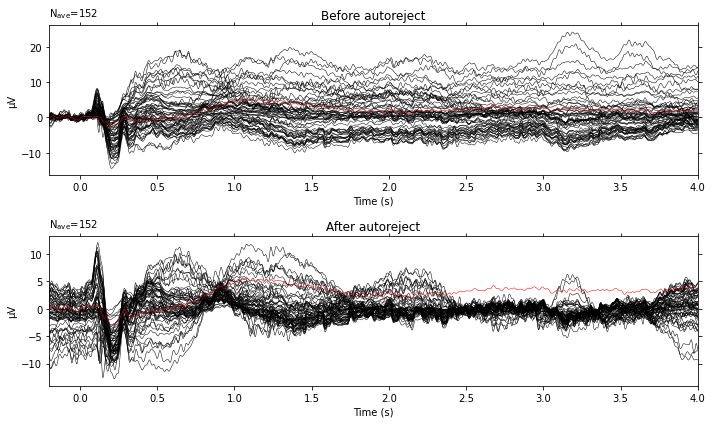

In [39]:
#Marking bad electrodes on the evoked
evoked.info['bads'] = ransac.bad_chs_
evoked_clean.info['bads'] = ransac.bad_chs_

fig8, axes = plt.subplots(2, 1, figsize=(10, 6))

for ax in axes:
    ax.tick_params(axis='x', which='both', bottom='off', top='off')
    ax.tick_params(axis='y', which='both', left='off', right='off')

evoked.plot(exclude=[], axes=axes[0], show=False)
axes[0].set_title('Before autoreject')
evoked_clean.plot(exclude=[], axes=axes[1], show=False)
axes[1].set_title('After autoreject')
plt.tight_layout()

#save figure
#fig8.savefig('/content/preprocessing_EEG_with_MNE/outputs_fig/fig8_evoked_epochs_clean.png', dpi=600)
#fig8.savefig('outputs_fig/fig8_evoked_epochs_clean.png', dpi=600)

##### ICA

In [40]:
#Filter high-pass
f_epochs_clean = epochs_clean.copy().filter(l_freq=1, h_freq=None)

In [41]:
# ICA parameters
random_state = 42       # ensures ICA is reproducable each time it's run
ica_n_components = .99  # Specify n_components as a decimal to set % explained variance

#Compute ICA
ica = mne.preprocessing.ICA(n_components=ica_n_components, random_state=random_state)
ica.fit(f_epochs_clean, reject=bias_reject, tstep=tfinal)

<ICA | epochs decomposition, method: fastica (fit in 46 iterations on 638552 samples), 27 ICA components explaining 99.0 % of variance (60 PCA components available), channel types: eeg, no sources marked for exclusion>

In [42]:
#Detect EOG related components using correlation
eog_idx, eog_scores = ica.find_bads_eog(f_epochs_clean, ch_name=['EOG1', 'EOG2', 'EOGz'])
print(eog_idx)

[2, 0, 1]


In [43]:
#Detect automatically ECG related components using correlation
#We don't have ECG reference channels

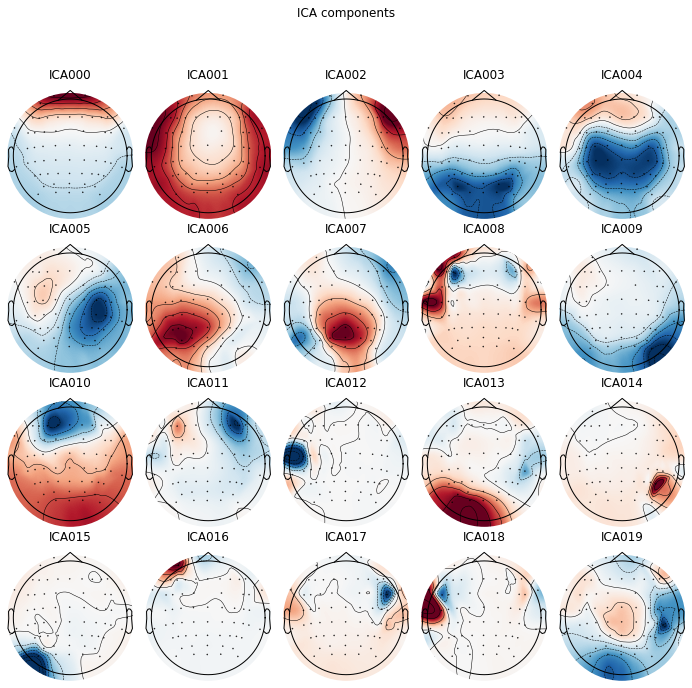

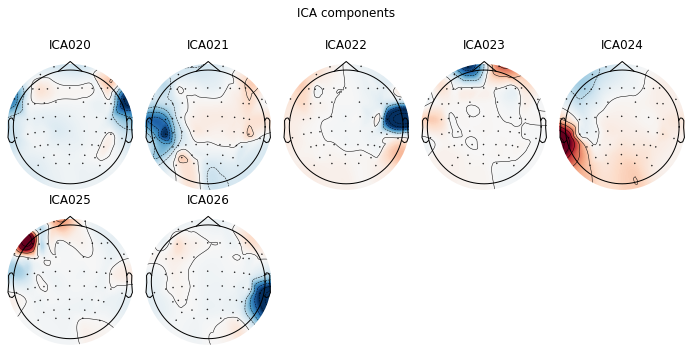

In [44]:
#Plot components
fig9 = ica.plot_components();

#save figures
#for i, fig in enumerate(fig9):
#    fig9[i].savefig(f'/content/preprocessing_EEG_with_MNE/outputs_fig/fig9_ica_components_part{i+1}.png', dpi=600)
#    fig9[i].savefig(f'outputs_fig/fig9_ica_components_part{i+1}.png', dpi=600)

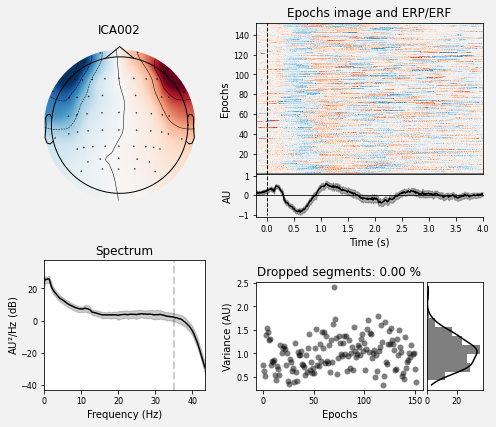

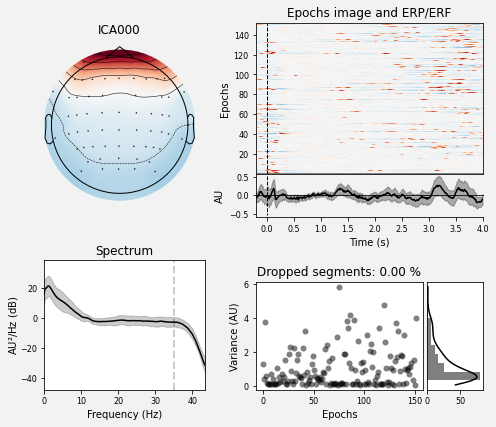

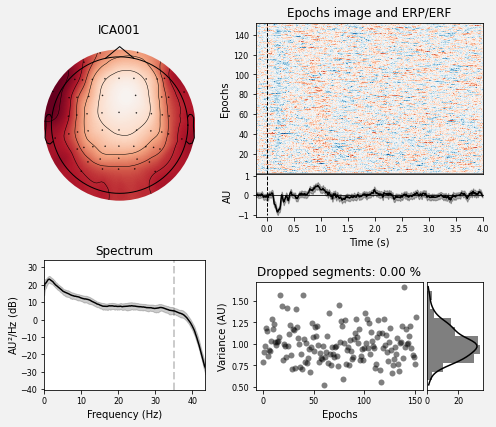

In [45]:
#Plot in the topography of the components in eog_idx
fig10 = ica.plot_properties(f_epochs_clean, eog_idx);

#save figure
#for i, (component, fig) in enumerate(zip(eog_idx, fig10)):
#    fig10[i].savefig(f'/content/preprocessing_EEG_with_MNE/outputs_fig/fig10_removed_ica_{component}_properties.png', dpi=600)
#    fig10[i].savefig(f'outputs_fig/fig10_removed_ica_{component}_properties.png', dpi=600)

In [46]:
#Exclude EOG-related components
ica.exclude = eog_idx

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


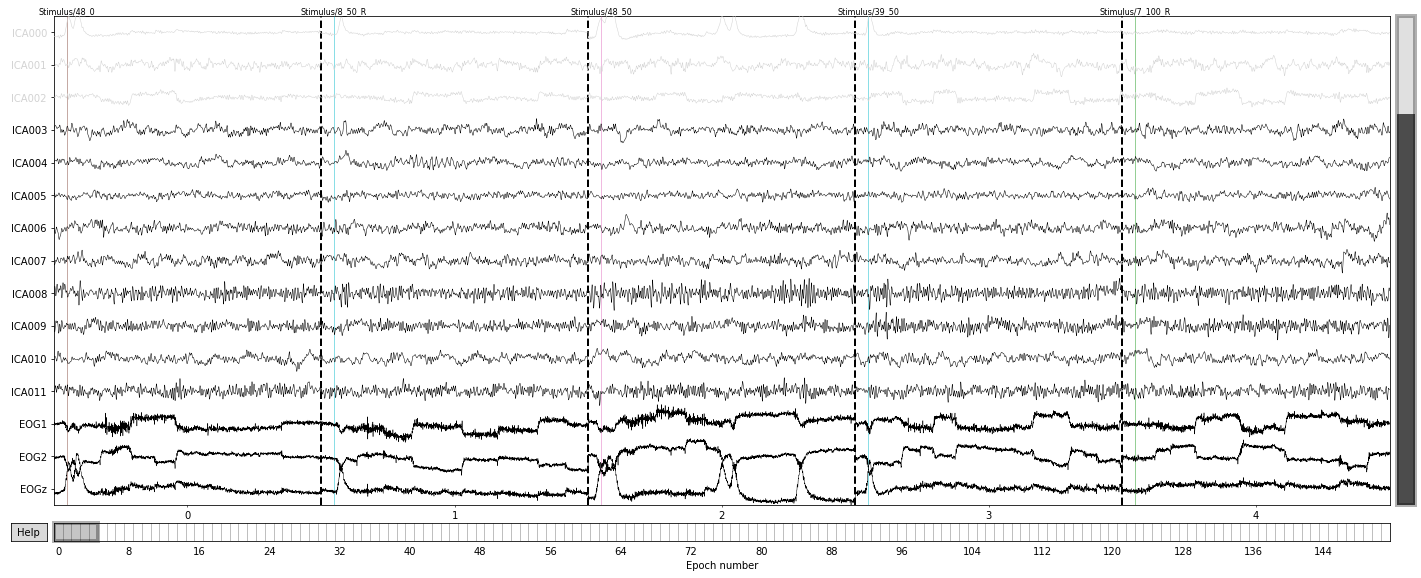

In [47]:
#Resizing plot figure
mne.set_config('MNE_BROWSE_RAW_SIZE','20,8')

#Plot the first components
fig11 = ica.plot_sources(f_epochs_clean, picks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], start=0, stop=5);

#save figure
#fig11.savefig('/content/preprocessing_EEG_with_MNE/outputs_fig/fig11_ica_sources_epochs_clean.png', dpi=600)
#fig11.savefig('outputs_fig/fig11_ica_sources_epochs_clean.png', dpi=600)

In [48]:
#Apply ICA to the data
f_epochs_clean_ica = ica.apply(f_epochs_clean.copy(), exclude=ica.exclude)

##### CAR

In [49]:
#Apply CAR (common average reference)
f_epochs_clean_ica_car = f_epochs_clean_ica.copy().set_eeg_reference('average', ch_type='eeg', projection=True)
f_epochs_clean_ica_car.apply_proj();

##### Comparation before/after the are ICA-CAR

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


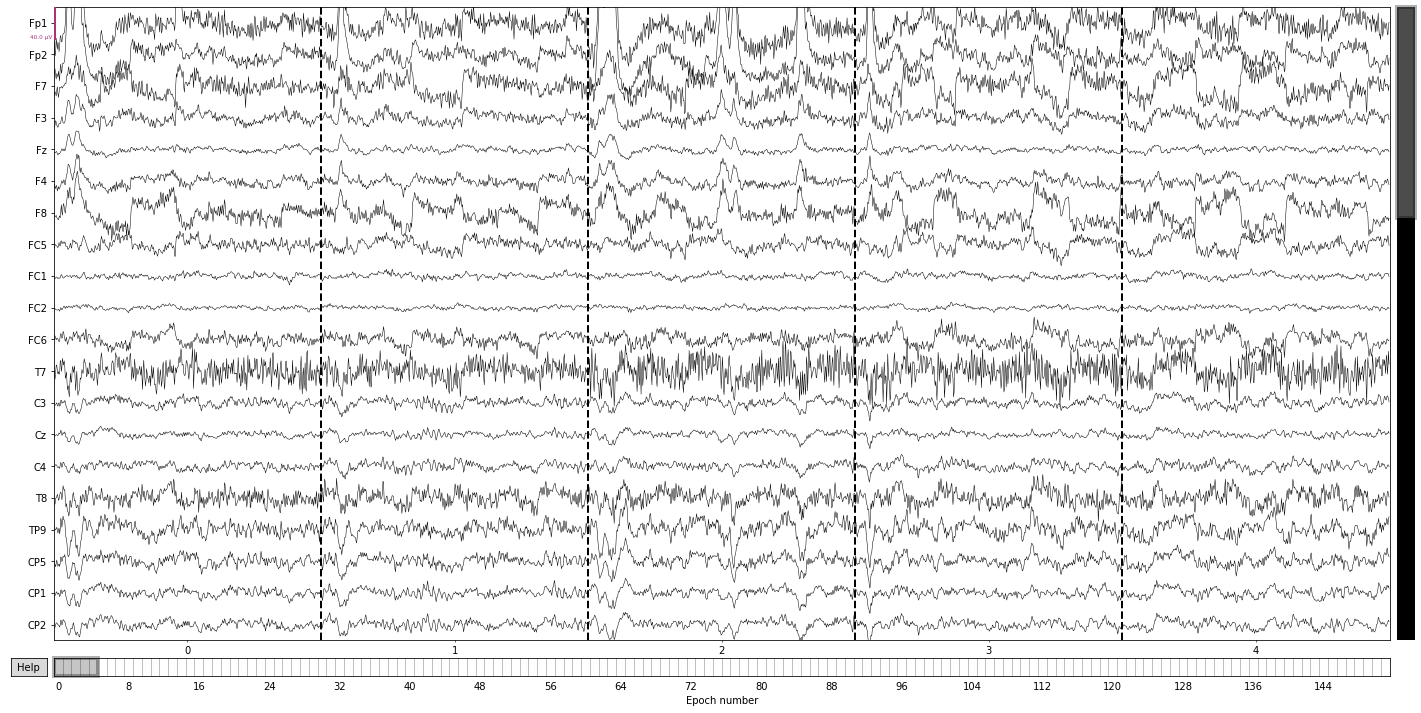

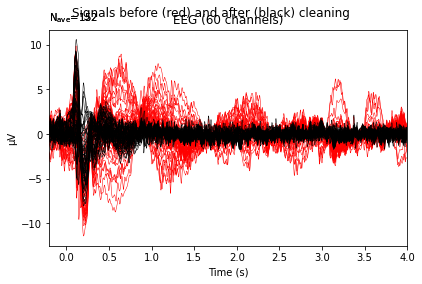

In [50]:
#Resizing plot figure
mne.set_config('MNE_BROWSE_RAW_SIZE','20,10')

#Filtered data before ICA-CAR
fig12 = f_epochs_clean.plot(n_epochs=5);
fig13 = ica.plot_overlay(f_epochs_clean.average());

#save figures
#fig12.savefig('/content/preprocessing_EEG_with_MNE/outputs_fig/fig12_filtered_signal_data_before_ica_car.png', dpi=600)
#fig12.savefig('outputs_fig/fig12_filtered_signal_data_before_ica_car.png', dpi=600)
#fig13.savefig('/content/preprocessing_EEG_with_MNE/outputs_fig/fig13_overlay_filtered_signal_data_before_ica_car.png', dpi=600)
#fig13.savefig('outputs_fig/fig13_overlay_filtered_signal_data_before_ica_car.png', dpi=600)

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


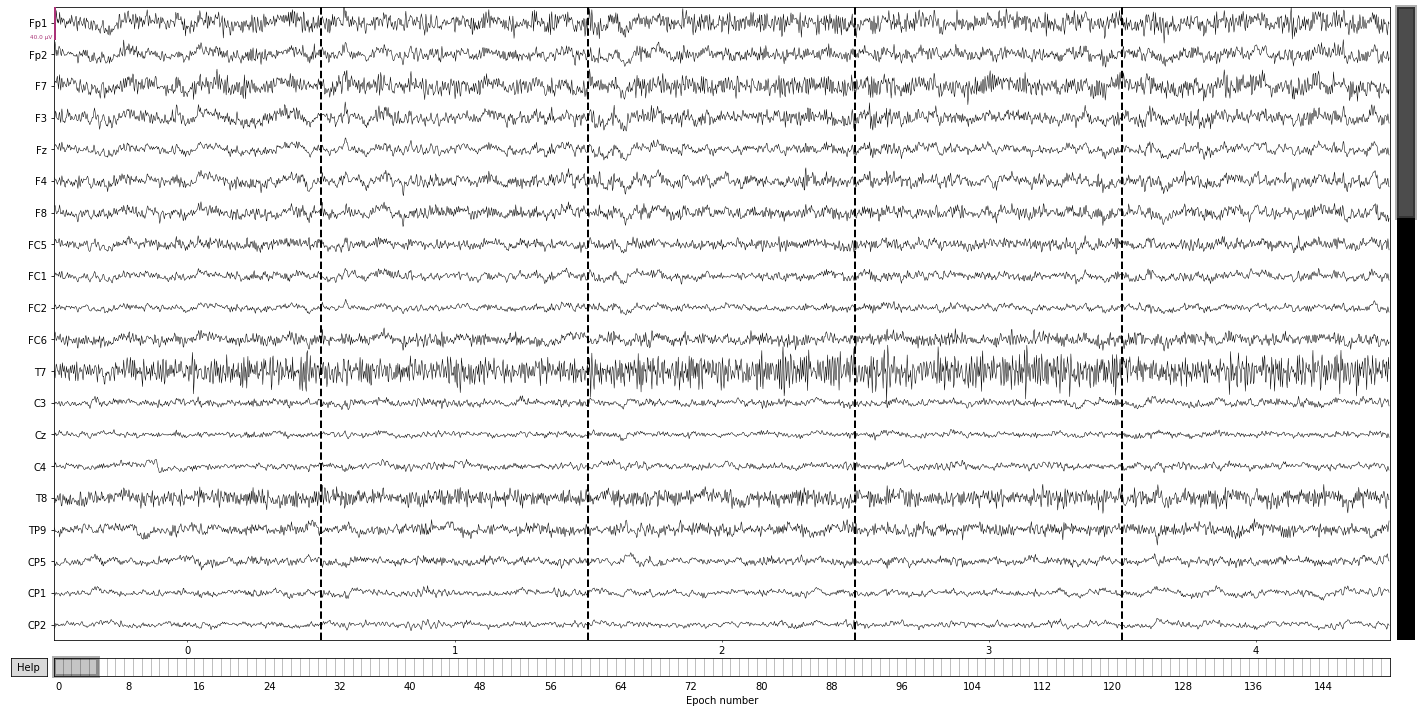

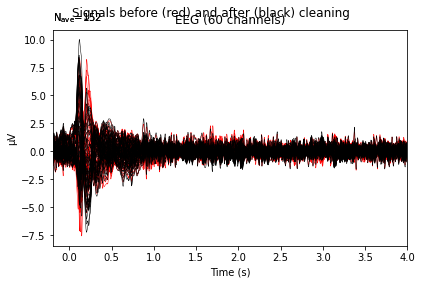

In [51]:
#Resizing plot figure
mne.set_config('MNE_BROWSE_RAW_SIZE','20,10')

#Filtered data after ICA-CAR
fig14 = f_epochs_clean_ica_car.plot(n_epochs=5);
fig15 = ica.plot_overlay(f_epochs_clean_ica_car.average());

#save figures
#fig14.savefig('/content/preprocessing_EEG_with_MNE/outputs_fig/fig14_filtered_signal_data_after_ica_car.png', dpi=600)
#fig14.savefig('outputs_fig/fig14_filtered_signal_data_after_ica_car.png', dpi=600)
#fig15.savefig('/content/preprocessing_EEG_with_MNE/outputs_fig/fig15_overlay_filtered_signal_data_after_ica_car.png', dpi=600)
#fig15.savefig('outputs_fig/fig15_overlay_filtered_signal_data_after_ica_car.png', dpi=600)

#### Selecting channels

In [52]:
#Selecting only the frontal, parietal, and reference lobe channels for eye movement
p_f_data = f_epochs_clean_ica_car.copy().pick_channels(['F1','F2','F3','F4','F5','F6','F7','F8','Fz','P1','P2','P3','P4','P5','P6','P7','P8','Pz'])
p_f_data.info

<Info | 9 non-empty values
 bads: []
 ch_names: F7, F3, Fz, F4, F8, P7, P3, Pz, P4, P8, F5, F1, F2, F6, P5, P1, ...
 chs: 18 EEG
 custom_ref_applied: False
 dig: 64 items (3 Cardinal, 61 EEG)
 highpass: 1.0 Hz
 lowpass: 35.0 Hz
 meas_date: 2015-10-02 15:10:43 UTC
 nchan: 18
 projs: Average EEG reference: on
 sfreq: 1000.0 Hz
>

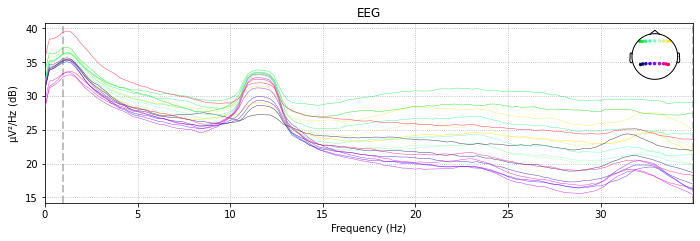

In [53]:
#Plotting filtered data from selected channels
fig16 = p_f_data.plot_psd(fmin=0, fmax=35, spatial_colors=True);

#save figure
#fig16.savefig('/content/preprocessing_EEG_with_MNE/outputs_fig/fig16_psd_filtered_data_selected_channels.png', dpi=600)
#fig16.savefig('outputs_fig/fig16_psd_filtered_data_selected_channels.png', dpi=600)

#### Save dataset final

In [54]:
#Datetime of the experiment
meas_date = p_f_data.info['meas_date']

#Dataframe with the events
dt_eeg = p_f_data.to_data_frame()

#Change time column to datetime type
dt_eeg['time'] = pd.to_datetime(dt_eeg['time'], unit='ms')

#Change dataframe index to a time column
dt_eeg.index = dt_eeg.time
dt_eeg.drop(['time'], axis=1, inplace=True)

#To save the dataframe in a .csv file
#dt_eeg.to_csv('/content/preprocessing_EEG_with_MNE/datasets/' + subject + '_epochs_clean.csv')
#dt_eeg.to_csv('datasets/' + subject + '_epochs_clean.csv')

dt_eeg

condition  epoch        F7        F3        Fz  \
time                                                                          
1969-12-31 23:59:59.800  Stimulus/48_0      0 -0.718529  1.200778  2.001816   
1969-12-31 23:59:59.801  Stimulus/48_0      0 -0.725092  0.998108  2.283134   
1969-12-31 23:59:59.802  Stimulus/48_0      0 -0.660187  0.712099  2.531844   
1969-12-31 23:59:59.803  Stimulus/48_0      0 -0.526206  0.359614  2.748427   
1969-12-31 23:59:59.804  Stimulus/48_0      0 -0.326337 -0.038669  2.935031   
...                                ...    ...       ...       ...       ...   
1970-01-01 00:00:03.996   Stimulus/8_0    151 -1.703734 -1.764675 -0.118026   
1970-01-01 00:00:03.997   Stimulus/8_0    151 -1.872563 -1.440617  0.010324   
1970-01-01 00:00:03.998   Stimulus/8_0    151 -1.997743 -1.120446  0.180096   
1970-01-01 00:00:03.999   Stimulus/8_0    151 -2.076858 -0.812910  0.385686   
1970-01-01 00:00:04.000   Stimulus/8_0    151 -2.109975 -0.526890  0.618866   

                               F4        F8        P7        P3        Pz  \
time                                                                        
1969-12-31 23:59:59.800  3.621958  2.994926  0.493413 -2.506667 -3.673154   
1969-12-31 23:59:59.801  3.865134  3.612775  0.752929 -2.654284 -4.169944   
1969-12-31 23:59:59.802  4.052165  4.229098  0.985274 -2.818333 -4.680020   
1969-12-31 23:59:59.803  4.188236  4.840737  1.174810 -3.002996 -5.199002   
1969-12-31 23:59:59.804  4.278050  5.443638  1.306735 -3.211196 -5.720530   
...                           ...       ...       ...       ...       ...   
1970-01-01 00:00:03.996  0.491831 -0.543277  3.623369  1.117675  0.985414   
1970-01-01 00:00:03.997  0.635368 -0.732416  3.452855  1.218008  0.943949   
1970-01-01 00:00:03.998  0.846328 -0.838052  3.247570  1.286967  0.856935   
1970-01-01 00:00:03.999  1.116507 -0.853984  3.010265  1.319770  0.728715   
1970-01-01 00:00:04.000  1.434399 -0.778338  2.745260  1.313734  0.566120   

                               P4        P8        F5        F1        F2  \
time                                                                        
1969-12-31 23:59:59.800 -3.130384 -0.307933  3.839500  0.701341  2.203590   
1969-12-31 23:59:59.801 -3.528469 -0.193064  3.361951  0.832235  2.474282   
1969-12-31 23:59:59.802 -3.921846 -0.075657  2.726707  0.918005  2.725283   
1969-12-31 23:59:59.803 -4.299962  0.042596  1.957337  0.965996  2.960599   
1969-12-31 23:59:59.804 -4.651875  0.158816  1.085382  0.985259  3.183952   
...                           ...       ...       ...       ...       ...   
1970-01-01 00:00:03.996  0.432492  3.918552 -3.721240 -1.196714 -0.367165   
1970-01-01 00:00:03.997  0.280141  4.246339 -3.263156 -0.921916 -0.231176   
1970-01-01 00:00:03.998  0.138779  4.576092 -2.758384 -0.619039 -0.040918   
1970-01-01 00:00:03.999  0.015027  4.895520 -2.225961 -0.297486  0.194922   
1970-01-01 00:00:04.000 -0.084746  5.192666 -1.686033  0.031771  0.464543   

                               F6        P5        P1        P2        P6  
time                                                                       
1969-12-31 23:59:59.800  3.744753 -1.854533 -3.129608 -4.250626 -2.465053  
1969-12-31 23:59:59.801  3.753504 -1.872025 -3.327315 -4.749672 -2.859814  
1969-12-31 23:59:59.802  3.701292 -1.896443 -3.544367 -5.235720 -3.245951  
1969-12-31 23:59:59.803  3.603210 -1.934882 -3.781951 -5.700429 -3.612960  
1969-12-31 23:59:59.804  3.472348 -1.994459 -4.039857 -6.135192 -3.950912  
...                           ...       ...       ...       ...       ...  
1970-01-01 00:00:03.996 -0.469145  0.994897  1.855340  0.492445  1.049027  
1970-01-01 00:00:03.997 -0.264671  0.939467  1.945851  0.493359  1.011151  
1970-01-01 00:00:03.998  0.003587  0.827217  1.963005  0.483016  0.954913  
1970-01-01 00:00:03.999  0.326370  0.655009  1.905596  0.463968  0.884621  
1970-01-01 00:00:04.000  0.691762  0.422562  1.776225  0.439594  0.805615  

[638552 